In [38]:
import numpy as np
import pandas as pd

df = pd.read_csv('./dataset/train.csv') 
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
#Missing Values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [40]:
unique_values = {col: df[col].unique() for col in df.columns}

unique_values

{'PassengerId': array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
        '9280_02'], dtype=object),
 'HomePlanet': array(['Europa', 'Earth', 'Mars', nan], dtype=object),
 'CryoSleep': array([False, True, nan], dtype=object),
 'Cabin': array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object),
 'Destination': array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object),
 'Age': array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
        48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
        47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
        36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
        67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
        79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
        69., 72., 77.]),
 'VIP': array([False, True, nan], dtype=object),
 'RoomService': array([   0.,  109.,   4

In [41]:
#Fill in missing data for numerical values using median
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
        df[col] = df[col].fillna(df[col].median())

In [42]:
#Droppin ID and name
df.drop(['PassengerId','Name'], axis=1, inplace=True)

In [43]:

df = df.dropna(subset=['HomePlanet','CryoSleep','Cabin','VIP'])

#Destination is deemed not important at a cursory glance
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

df.isna().sum()


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [44]:
columns_to_encode = ['HomePlanet','Destination']

df = pd.get_dummies(df,columns=columns_to_encode, drop_first=True)



In [45]:
#Target encoding for Cabin
target_mean = df.groupby('Cabin')['Transported'].mean()
df['Cabin'] = df['Cabin'].map(target_mean)

df[['Cabin','Transported']]

,Cabin,Transported
0,0.0,False
1,1.0,True
2,0.0,False
3,0.0,False
4,1.0,True
...,...,...
8688,0.0,False
8689,0.0,False
8690,1.0,True
8691,0.5,False


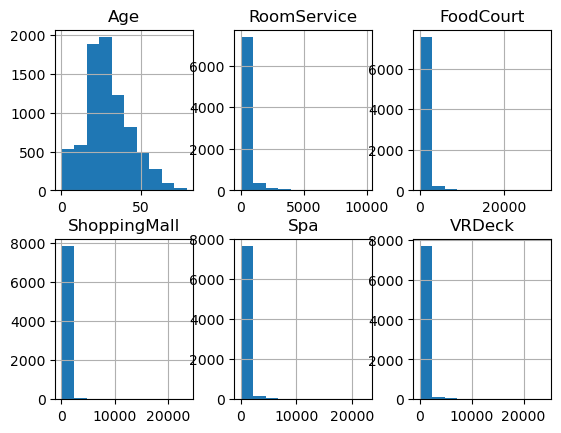

In [46]:
#Check distributions of numeric data
from matplotlib import pyplot as plt

numerical_columns = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].name != 'Cabin':  # Check if the column is numerical
        numerical_columns.append(df[col].name)

numerical_df = df[numerical_columns]

numerical_df.hist(layout=(2, 3))
plt.show()

In [47]:
#Transform the data
def transform_to_normal(df:pd.DataFrame):

    numerical_columns = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64'] and df[col].name != 'Cabin':  # Check if the column is numerical
            numerical_columns.append(df[col].name)

    for col in df.columns:
        if col in columns_to_transform and col != 'Age':
            df[col] = np.log(df[col]+1)

    return df


columns_to_transform:list = numerical_columns

print(numerical_columns)

numerical_df = transform_to_normal(numerical_df)


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


/var/folders/0r/b5q635yn4bd0y1jbq55llxcc0000gn/T/ipykernel_4029/3669452635.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col]+1)


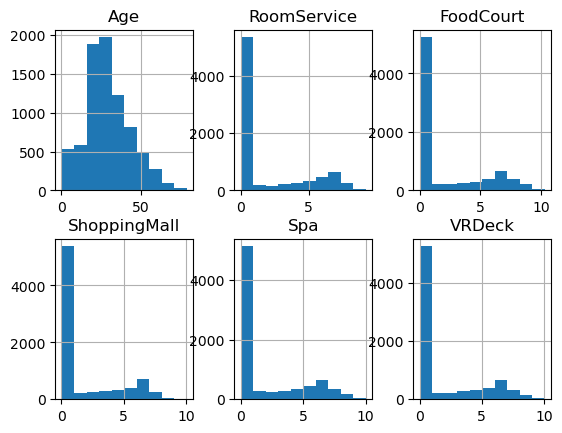

In [48]:
numerical_df.hist(layout=(2, 3))
plt.show()

In [49]:
#Merge DFs
for col in numerical_df.columns:
    df[col] = numerical_df[col]

print(df.columns)


Index(['CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')


In [50]:
#Encode binary data

def encode_to_binary(df:pd.DataFrame):
    df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0})
    df['VIP'] = df['VIP'].map({True: 1, False: 0})

    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)


    X = df.drop(['Transported'], axis = 1)
    y = df['Transported']

    return (X,y)


In [51]:
import statsmodels.api as sm

X_logistic = sm.add_constant(X)
model = sm.Logit(y, X_logistic).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.100357
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 7904
Model:                          Logit   Df Residuals:                     7890
Method:                           MLE   Df Model:                           13
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.8552
Time:                        11:24:12   Log-Likelihood:                -793.22
converged:                       True   LL-Null:                       -5478.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.4060      0.263    -16.753      0.000      -4.

In [52]:
#Read testing data

test_df = pd.read_csv('./dataset/test.csv')

#Fill in missing data for numerical values using median
for col in test_df.columns:
    if test_df[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
        test_df[col] = test_df[col].fillna(df[col].median())


test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64